In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('game data.csv')

In [7]:
df.head()

Days Outlook Temprature  Routine Wear Jacket?
0     1   Sunny       Cold  Indoor            No
1     2  Cloudy       Cold  Indoor           Yes
2     3  Cloudy       Warm  Outdoor           No
3     4   Sunny       Cold  Outdoor          Yes
4     5  Cloudy       Cold  Outdoor          Yes

In [8]:
df.drop('Days',axis=1, inplace=True)
df.head()

Outlook Temprature  Routine Wear Jacket?
0   Sunny       Cold  Indoor            No
1  Cloudy       Cold  Indoor           Yes
2  Cloudy       Warm  Outdoor           No
3   Sunny       Cold  Outdoor          Yes
4  Cloudy       Cold  Outdoor          Yes

In [9]:
x = df.drop('Wear Jacket?',axis=1)
y = df[['Wear Jacket?']]

In [10]:
x.head()

Outlook Temprature  Routine
0   Sunny       Cold  Indoor 
1  Cloudy       Cold  Indoor 
2  Cloudy       Warm  Outdoor
3   Sunny       Cold  Outdoor
4  Cloudy       Cold  Outdoor

In [11]:
y.head()

Wear Jacket?
0           No
1          Yes
2           No
3          Yes
4          Yes

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
x.Outlook = le.fit_transform(x['Outlook'])

In [15]:
x.Temprature = le.fit_transform(x['Temprature'])

In [16]:
x.Routine = le.fit_transform(x['Routine'])

In [17]:
x.head()

Outlook  Temprature  Routine
0        1           0        0
1        0           0        0
2        0           1        1
3        1           0        1
4        0           0        1

In [18]:
clf = DecisionTreeClassifier()

In [19]:
clf.fit(x,y)

DecisionTreeClassifier()

In [20]:
clf.predict([[1,0,0]]) #sunny, cold, indoor

array(['No'], dtype=object)

In [21]:
clf.predict([[0,0,1]])

array(['Yes'], dtype=object)

In [29]:
clf.score(x,y)

1.0

In [22]:
from sklearn import tree
from matplotlib import pyplot

[Text(0.6666666666666666, 0.875, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

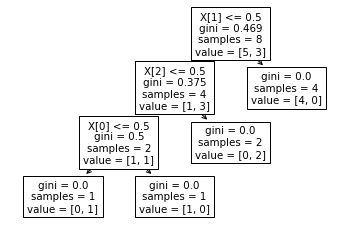

In [28]:
tree.plot_tree(clf)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

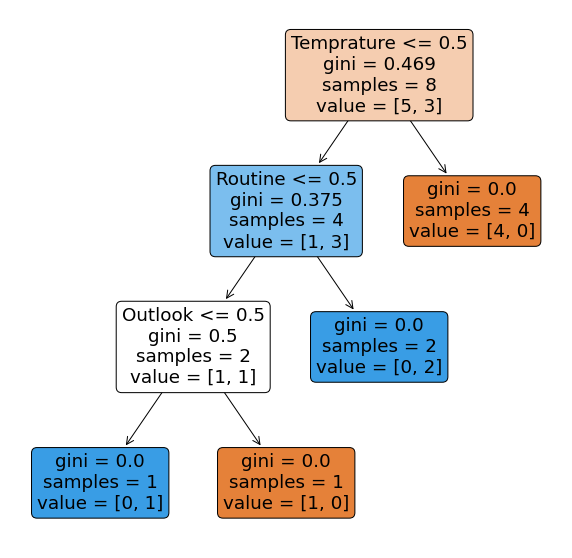

In [24]:
pyplot.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)

In [25]:
df.Temprature

0    Cold
1    Cold
2    Warm
3    Cold
4    Cold
5    Warm
6    Warm
7    Warm
Name: Temprature, dtype: object

In [26]:
df.head()

Outlook Temprature  Routine Wear Jacket?
0   Sunny       Cold  Indoor            No
1  Cloudy       Cold  Indoor           Yes
2  Cloudy       Warm  Outdoor           No
3   Sunny       Cold  Outdoor          Yes
4  Cloudy       Cold  Outdoor          Yes

In [27]:
text = tree.export_text(clf)
print(text)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: Yes
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: No
|   |--- feature_2 >  0.50
|   |   |--- class: Yes
|--- feature_1 >  0.50
|   |--- class: No



In [30]:
x.head()

Outlook  Temprature  Routine
0        1           0        0
1        0           0        0
2        0           1        1
3        1           0        1
4        0           0        1

In [32]:
from sklearn.naive_bayes import GaussianNB

In [37]:
GNB = GaussianNB()

In [38]:
GNB.fit(x,y)

GaussianNB()

In [39]:
GNB.score(x,y)

0.875

In [40]:
from sklearn.naive_bayes import BernoulliNB

In [41]:
BNB = BernoulliNB()

In [42]:
BNB.fit(x,y)

BernoulliNB()

In [43]:
BNB.score(x,y)

1.0

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
MNB = MultinomialNB()

In [46]:
MNB.fit(x,y)

MultinomialNB()

In [47]:
MNB.score(x,y)

0.875

In [50]:
from sklearn.svm import SVC

In [51]:
Model = SVC()

In [52]:
Model.fit(x,y)

SVC()

In [53]:
Model.score(x,y)

1.0